# Reproduction: Neal's Funnel

---- Finished running BAOAB ----
---- Finished running ZBAOABZ ----


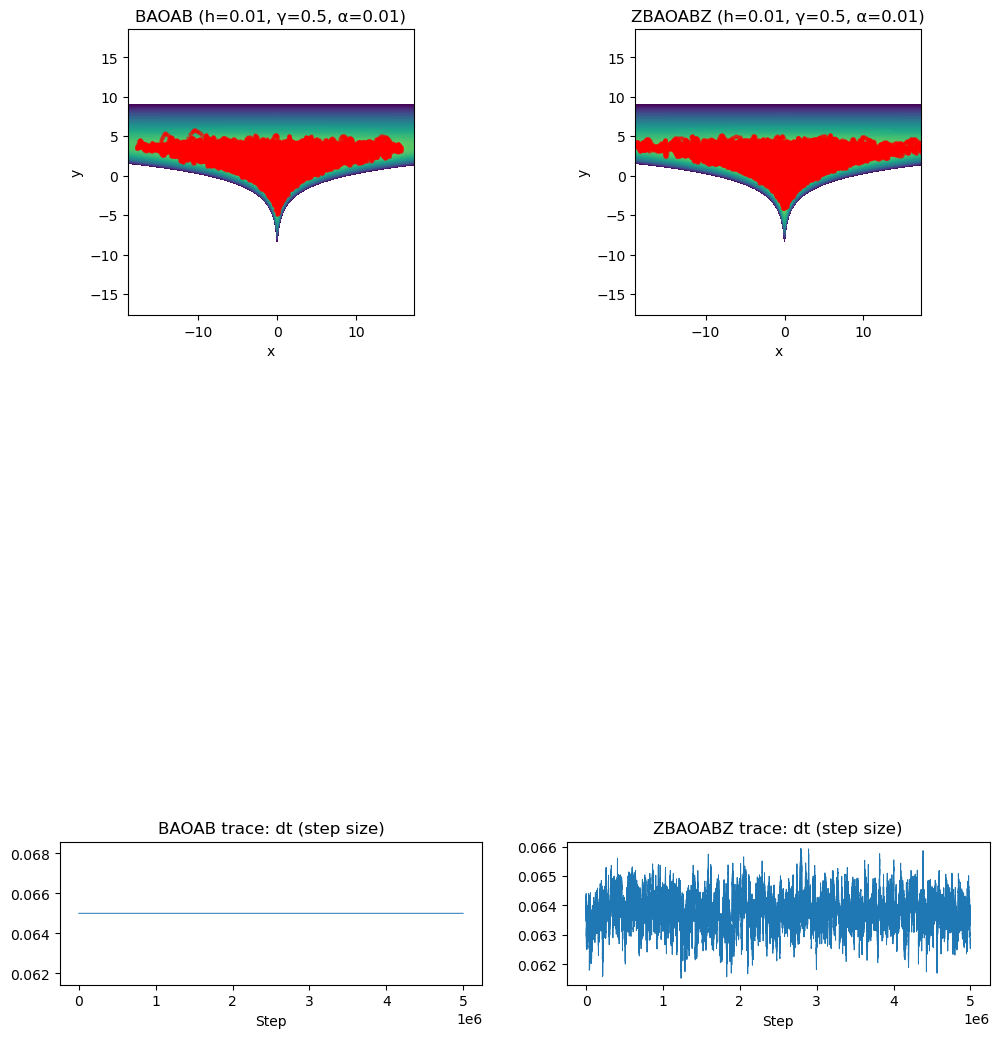

In [ ]:
# TODO: Reweight samples for ZBAOABZ. Compute expectation semilogy curves. Plot stepsize distributions.

import numpy as np
from numba import njit
from ipywidgets import interact, FloatLogSlider
from viz import plot_samplers
import warnings
warnings.filterwarnings("ignore")
from viz import plot_samplers
from ipywidgets import fixed

# --- Neal's funnel potential ---
@njit
def grad_U(z):
    y, x = z
    grad_y = y - 0.5 * np.exp(-y) * (x**2)
    grad_x = np.exp(-y) * x
    return np.array([grad_y, grad_x])

# --- Target log density for contours ---
def log_p(y, x):
    return -0.5 * (y**2 + np.exp(-y)*x**2)

xs = np.linspace(-20, 20, 400)
ys = np.linspace(-10, 10, 300)
X, Y = np.meshgrid(xs, ys)
LOGZ = log_p(Y, X)
vmax, vmin = LOGZ.max(), LOGZ.max() - 40
levels = np.linspace(vmin, vmax, 60)
m, M, r, s = 0.5, 50, 0.25, 2
b = 6.5 # non-adaptive stepsize multiplier. It makes stepsize for non-adaptive (b * h)
burnin = int(1e5)
nsteps = int(1e7)

plot_samplers(
    alpha=0.01,
    h=0.01,
    gamma=0.5,
    beta=1.,
    grad_U=grad_U,
    X=X,
    Y=Y,
    LOGZ=LOGZ,
    levels=levels,
    m=m,
    M=M,
    r=r,
    s=s,
    b = b,
    burnin=burnin,
    nsteps=nsteps,
    record_trace=True,
    plot_stride=2)

In [ ]:
interact(
    plot_samplers,
    alpha=FloatLogSlider(value=0.1, base=10, min=-2, max=2, step=0.1, description='alpha'),
    h=FloatLogSlider(value=0.01, base=10, min=-3, max=0, step=0.1, description='h'),
    gamma=FloatLogSlider(value=1.0, base=10, min=-2, max=2, step=0.1, description='gamma'),
    beta=FloatLogSlider(value=1.0, base=10, min=-4, max=4, step=0.1, description='beta'),
    grad_U=fixed(grad_U),
    X=fixed(X),
    Y=fixed(Y),
    LOGZ=fixed(LOGZ),
    levels=fixed(levels),
    m=fixed(m),
    M=fixed(M),
    r=fixed(r),
    burnin=fixed(burnin),
    nsteps=fixed(nsteps),
    record_trace=fixed(False),
    plot_stride=fixed(5)
)
